In [1]:
import numpy as np
import pandas as pd
import urllib.request
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diamonds_train.csv", index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


<AxesSubplot:>

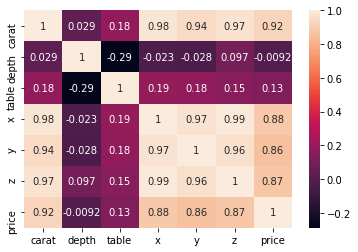

In [4]:
sns.heatmap(df.corr(), annot=True)

In [5]:
df.cut.value_counts()

Ideal        16090
Premium      10339
Very Good     9036
Good          3694
Fair          1186
Name: cut, dtype: int64

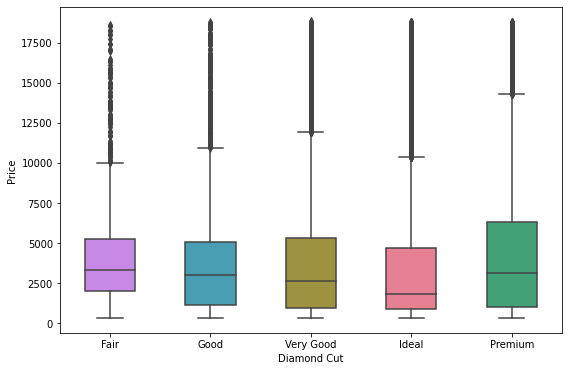

In [6]:
cuts = ['Fair','Good','Very Good','Ideal','Premium']
plt.figure(figsize=(9,6))
# Create plot
fig = sns.boxplot(y='price',x='cut',hue='cut',data=df,palette='husl',order=cuts,width=0.5,
                  dodge=False)

plt.xlabel('Diamond Cut')                      
plt.ylabel('Price')                            
fig.get_legend().remove()
plt.show(fig)

Ideal    -->    2
Premium    -->  5
Very Good   -->  4
Good     -->     3
Fair     -->     1

In [7]:
df.color.value_counts()

G    8499
E    7351
F    7130
H    6234
D    5074
I    4023
J    2034
Name: color, dtype: int64

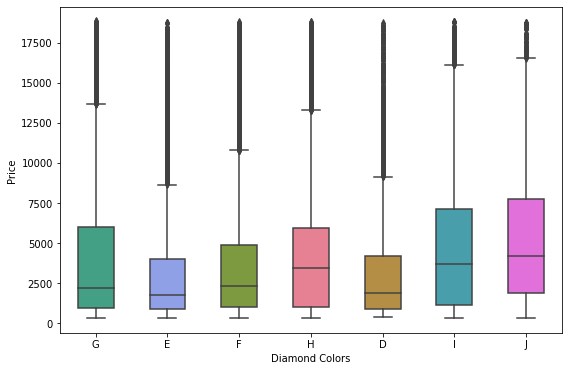

In [8]:
colors = ['G','E','F', 'H', 'D', 'I', 'J']
plt.figure(figsize=(9,6))
# Create plot
fig = sns.boxplot(y='price',x='color',hue='color',data=df,palette='husl',order=colors,width=0.5,
                  dodge=False)

plt.xlabel('Diamond Colors')                      
plt.ylabel('Price')                            
fig.get_legend().remove()
plt.show(fig)

G  -->  5
E  -->  7
F  -->  3
H   --> 4
D  -->  6
I  -->  2
J  -->  1

In [9]:
df.clarity.value_counts()

SI1     9751
VS2     9178
SI2     6828
VS1     6101
VVS2    3858
VVS1    2714
IF      1362
I1       553
Name: clarity, dtype: int64

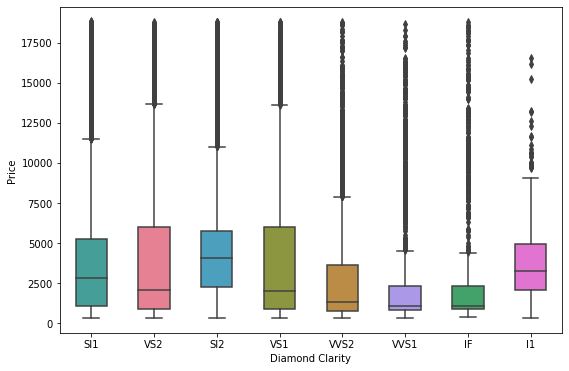

In [10]:
clear = ['SI1','VS2','SI2','VS1','VVS2','VVS1','IF','I1']
plt.figure(figsize=(9,6))
# Create plot
fig = sns.boxplot(y='price',x='clarity',hue='clarity',data=df,palette='husl',order=clear,width=0.5,
                  dodge=False)

plt.xlabel('Diamond Clarity')                      
plt.ylabel('Price')                            
fig.get_legend().remove()
plt.show(fig)

SI1  -->   3
VS2   -->  4
SI2   -->  2
VS1  -->   5
VVS2  -->  6
VVS1  -->  7
IF   -->   8
I1    -->  1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.4+ MB


In [13]:
def codi(df):
    '''
    Esta función da valores numéricos a las columnas cut, color y clarity
    '''
    cols = ['cut', 'color', 'clarity']
    for col in cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df


In [14]:
def ordering(df):
    df.replace(['Fair','Good','Very Good','Ideal','Premium'], [1, 2, 3, 5, 4],inplace=True)
    df.replace(['G','E','F', 'H', 'D', 'I', 'J'], [4, 6, 5, 3, 7, 2, 1],inplace=True)
    df.replace(['SI1','VS2','SI2','VS1','VVS2','VVS1','IF','I1'], [3, 4, 2,5,6,7,8,1], inplace= True)
    return df

In [15]:
ordering(df)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,5,3,4,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,3,7,6,64.0,56.0,4.14,4.17,2.66,532
2,0.42,4,5,5,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,5,3,8,61.1,57.0,4.16,4.12,2.53,600
4,1.10,2,4,3,63.4,57.0,6.52,6.55,4.14,4997
...,...,...,...,...,...,...,...,...,...,...
40340,1.55,4,3,4,61.3,61.0,7.46,7.39,4.55,11708
40341,0.36,5,7,3,60.6,56.0,4.58,4.63,2.79,619
40342,0.57,3,2,4,62.2,55.0,5.33,5.34,3.32,1267
40343,1.01,3,5,8,59.6,62.0,6.47,6.56,3.88,9965


<AxesSubplot:>

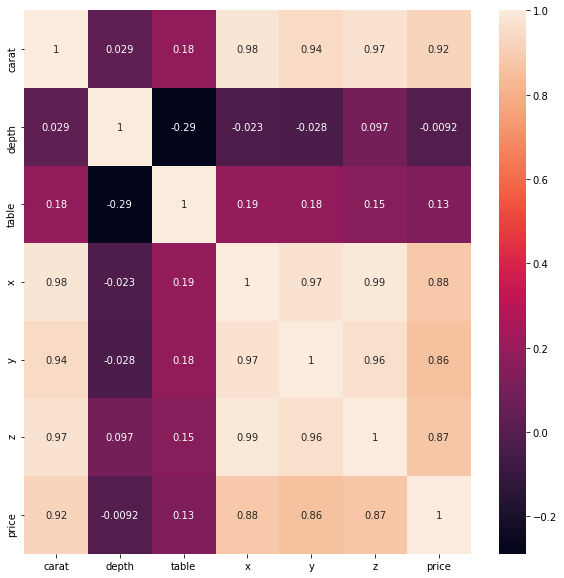

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df.corr(), annot=True)

In [16]:
X  = np.array(df[['carat', 'cut', 'color', 'clarity']])
y = np.array(df["price"])

In [33]:
rfc = RandomForestRegressor(n_jobs=-1,max_features= 'sqrt', max_depth=100, min_samples_split=5, n_estimators=50, criterion = "mse")

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=400)
rfc.fit(Xz, y)
y_pred = rfc.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE (test) =",rmse)

RMSE (test) = 398.99645716239684


In [34]:
X_pred = pd.read_csv("diamonds_test.csv", index_col=0)
X_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [35]:
ordering(X_pred)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,5,3,2,60.0,56.0,4.41,4.43,2.65
1,0.34,5,7,8,62.1,57.0,4.52,4.46,2.79
2,1.57,3,2,4,60.3,58.0,7.58,7.55,4.56
3,0.31,5,3,4,61.8,57.0,4.32,4.36,2.68
4,1.51,2,2,7,64.0,60.0,7.26,7.21,4.63
...,...,...,...,...,...,...,...,...,...
13444,1.05,5,5,2,60.3,55.0,6.55,6.68,3.99
13445,0.27,3,4,5,61.9,56.0,4.13,4.16,2.56
13446,1.50,4,7,4,61.8,60.0,7.30,7.37,4.53
13447,1.70,4,5,2,60.2,61.0,7.79,7.68,4.66


In [36]:
pred_x = np.array(X_pred[['carat','cut', 'color', 'clarity']])

In [22]:
'''
X_raw = df[['carat','cut', 'color', 'clarity']]
scaler = preprocessing.StandardScaler().fit(X_raw.values)
pred_x =scaler.transform(X_raw)
pred_x
'''

"\nX_raw = df[['carat','cut', 'color', 'clarity']]\nscaler = preprocessing.StandardScaler().fit(X_raw.values)\npred_x =scaler.transform(X_raw)\npred_x\n"

In [37]:
predictions_submit = rfc.predict(pred_x)
predictions_submit

array([  510.8983652 ,  1265.45277778,  9449.99335714, ...,
       13991.14268043,  9479.40528571,   743.67100567])

In [38]:
sample = pd.read_csv("sample_submission.csv")
submission = pd.DataFrame({"id": range(len(predictions_submit)), "price": predictions_submit})

In [39]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission8.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")
chequeator(submission)

You're ready to submit!
